In [320]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [321]:
img = cv2.imread('OpenCV.jpg',10)

In [322]:
img.shape

(739, 600, 3)

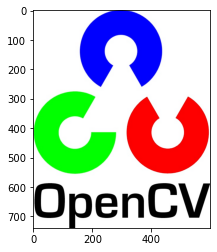

In [323]:
plt.imshow(img)
plt.show()

### Problema 1:

In [324]:
def CambiaColor(imagen,color):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    
    lienzo = np.zeros((alto,ancho,3))
    
    for i in range(0,alto):
        for j in range(0, ancho):
            pixel = img[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            
            if color == 1:
                lienzo[i, j] = [blue,0,0]
            elif color == 2:
                lienzo[i, j] = [0,green,0]
            elif color == 3:
                lienzo[i, j] = [0,0,red]  
            elif color == 10:
                lienzo[i, j] = [0,green,red]
            elif color == 20:
                lienzo[i, j] = [blue,green,0]  
            elif color == 30:
                lienzo[i, j] = [blue,0,red] 
    return lienzo

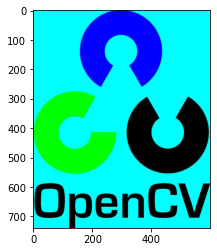

In [327]:
lienzo = CambiaColor(img,20)

cv2.imwrite("NuevaImagen.jpg",lienzo)
NuevaImagen = cv2.imread("NuevaImagen.jpg")

NuevaImagen = cv2.cvtColor(NuevaImagen, cv2.COLOR_BGR2RGB)
plt.imshow(NuevaImagen)
plt.show()

###  Problema 2:

In [328]:
B = cv2.imread("imagen1_salida_gray_azul.jpg")
R = cv2.imread("imagen1_salida_gray_rojo.jpg")
G = cv2.imread("imagen1_salida_gray_verde.jpg")

In [329]:
B = B * [1,0,0]
G = G * [0,1,0]
R = G * [0,0,1]

In [330]:
Unida = B+G+R

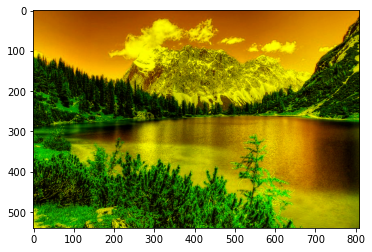

In [331]:
plt.imshow(Unida)
plt.show()

###  Problema 3:

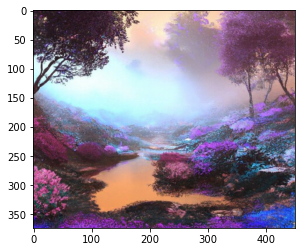

In [332]:
Original = cv2.imread("imagen.jpg")
plt.imshow(Original)
plt.show()

In [333]:
def Gray (im):
    B,G,R = cv2.split(im)
    Gray_B = cv2.merge([B,B,B])
    Gray_G = cv2.merge([G,G,G])
    Gray_R = cv2.merge([R,R,R])
    
    cv2.imwrite("Gray_B.jpg",Gray_B)
    cv2.imwrite("Gray_G.jpg",Gray_G)
    cv2.imwrite("Gray_R.jpg",Gray_R)
    
    return Gray_B,Gray_G,Gray_R

In [334]:
Gray_B,Gray_G,Gray_R = Gray(Original)

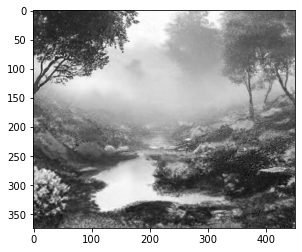

In [335]:
plt.imshow(Gray_B)
plt.show()

###  Problema 4:

In [336]:
def Histogramas(ima):
    alto = ima.shape[0]
    ancho = ima.shape[1]
    azul = []
    verde = []
    rojo = []
    gris = []

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = ima[i, j]

            azul.append(pixel[2]) 
            verde.append(pixel[1])
            rojo.append(pixel[0])
            gris.append(int(pixel[0])*0.3+int(pixel[1])*0.59+int(pixel[2])*0.11)
            
    fig, ax = plt.subplots(2,2)
    
    fig.set_figheight(10)
    fig.set_figwidth(20)

    ax[0,0].hist(azul,256,[0,256],color='blue')
    ax[0,0].set_title('Azul')
    ax[0,0].axvline(x=np.mean(azul),color='purple')
    ax[0,0].axis('off')
    
    ax[0,1].hist(verde,256,[0,256],color='green')
    ax[0,1].set_title('Verde')
    ax[0,1].axvline(x=np.mean(verde),color='orange')
    ax[0,1].axis('off')
  
    ax[1,0].hist(rojo,256,[0,256],color='red')
    ax[1,0].set_title('Rojo')
    ax[1,0].axvline(x=np.mean(rojo),color='turquoise')
    ax[1,0].axis('off')

    ax[1,1].hist(gris,256,[0,256],color='gray')
    ax[1,1].set_title('Gris')
    ax[1,1].axvline(x=np.mean(gris),color='red')
    ax[1,1].axis('off')
    
    plt.show()

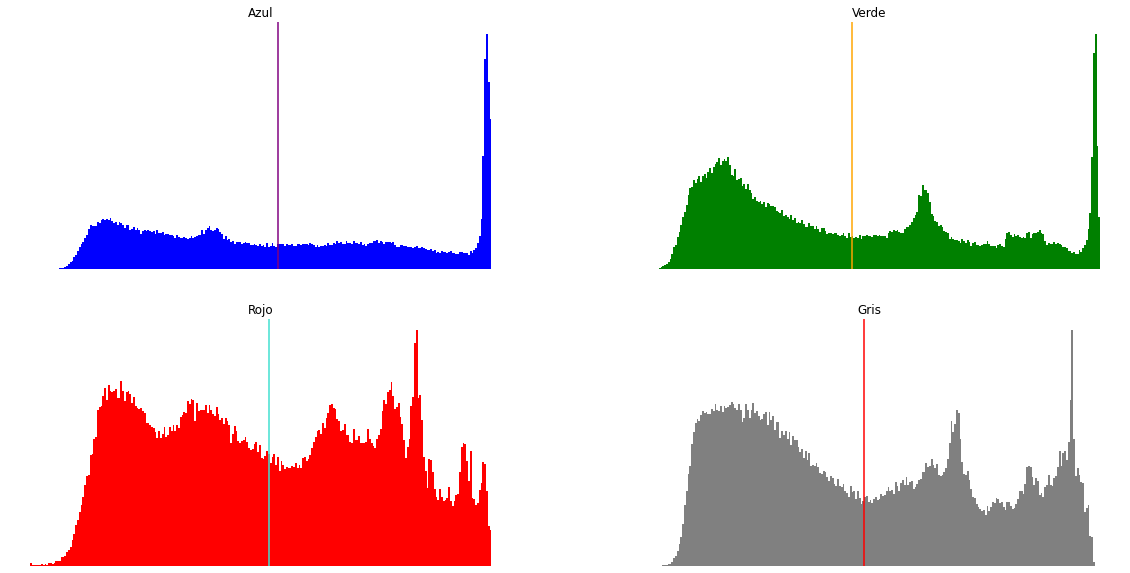

In [337]:
Histogramas(Original)

### Problema 5: 

conversión de una imagen en color a escala de grises, el equivalente a la luminancia de la imagen. Como ya sabemos el ojo percibe distintas intesidades de luz en función del color que se observe, esto es debido a la respuesta del ojo al espectro visible la cual se puede observar en la figura, por esa razón el cálculo del equivalente blanco y negro (escala de grises o luminancia) de la imagen debe realizarse como una media ponderada de las distintas componentes de color de cada pixel.

La ecuación de la luminancia nos muestra es la expresión matemática de ese fenómeno y los factores de ponderación de cada componente de color nos indican la sensibilidad del ojo humano a las frecuencias del espectro cercanas al rojo, verde y azul.

Y = R*0.3+G*0.59+B*0.11

La función para la conversión a escala de grises ponderada se implementó en el punto anterior. 

### Problema 6:

El modelo HSV fue creado en 1978 por Alvy Ray Smith. Se trata de una transformación no lineal del espacio de color RGB, y se puede usar en progresiones de color. 

Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.
